#第一題
請分析‘2019STA.xlsx'檔案中男女同學小考(Quiz)、期中考(Mid_Exam)、期末考(Final_Exam)之平均成績是否具有顯著地差異？並以表格或圖形男女同學小考(Quiz)、期中考(Mid_Exam)、期末考(Final_Exam)之平均成績


In [ ]:
import pandas as pd
from scipy import stats
df = pd.read_excel('2019STA.xlsx')

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-05-19 04:06:27--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.199.102, 74.125.199.100, 74.125.199.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.199.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g359fdd60aqf160oahsvglgr5js4c6gv/1621397175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-05-19 04:06:28--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g359fdd60aqf160oahsvglgr5js4c6gv/1621397175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125

In [ ]:
df.head()

,Department,Grade,Gender,Quiz,Mid_Exam,Final_Exam
0,BA,一A,M,81,72.0,80
1,BA,一A,M,80,87.5,90
2,BA,一A,M,69,74.0,76
3,BA,一A,F,58,52.0,50
4,BA,一A,M,82,76.0,78


In [ ]:
df.groupby('Gender').size()

Gender
F    27
M    30
dtype: int64

In [ ]:
qv2=['Quiz','Mid_Exam','Final_Exam']

In [ ]:
name=[]
alist=[]
pvlist=[]
for i in range(len(qv2)):
  #分別取t_test變數與 Gender='M' 及 Gender='F'的交集去做t檢定
  (a,pv)=stats.ttest_ind(df[qv2[i]][df['Gender']=='F'],df[qv2[i]][df['Gender']=='M'])
  #將t_test項目加進name中
  name.append(qv2[i])
  #將a(t值)加進alist中
  alist.append(a)
  #將pv值加進pvlist中
  pvlist.append(pv)

In [ ]:
#lambda表示式是一種效能比較好的迴圈,跑比較快
pd.set_option('display.float_format',lambda x:'%.2f'%x)
#將alist資料結構用DataFrame顯示出
result=pd.DataFrame(alist,name,columns=['t-value'])
#將pvlist加進result第二欄
result.insert(1,'p-value',pvlist)
result

,t-value,p-value
Quiz,2.79,0.01
Mid_Exam,2.65,0.01
Final_Exam,1.97,0.05


In [ ]:
df_mean = df.groupby('Gender').mean()
df_size = pd.DataFrame(df.groupby('Gender').size(),columns=['人數'])
res = pd.concat([df_size,df_mean], axis=1)
res

,人數,Quiz,Mid_Exam,Final_Exam
Gender,,,,
F,27,71.15,70.70,72.30
M,30,54.07,54.15,61.97


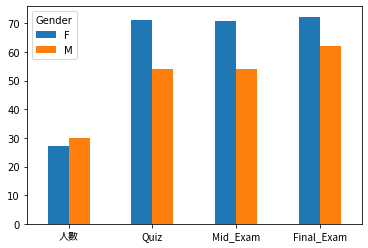

In [ ]:
axes = res.T.plot.bar(rot = 0)
for label in axes.get_xticklabels():
    label.set_fontproperties(myfont)
plt.show()

結果說明:由上述結果可得知 男女的差別生在T檢定下 發生型一錯誤的機率趨近於零且三樣數據皆超出拒絕愈域 可表示有明顯差異，特別是小考跟期中考的部分，皆為非常顯著的差異